In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

sample=pd.read_csv('sampleData.csv')


Matplotlib is building the font cache; this may take a moment.


In [47]:
sample['Value']

0      10
1      12
2      13
3      15
4      16
5      17
6      18
7      19
8      20
9      21
10     22
11     23
12     24
13     25
14     28
15     29
16    100
17    105
Name: Value, dtype: int64

## Detecting outliers

In [48]:
sample

Q1 = np.percentile(sample, 25)
Q3 = np.percentile(sample, 75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = [x for x in sample['Value'] if x < lower_bound or x > upper_bound]


print("IQR:", IQR)
print("Outliers:", outliers)


IQR: 10.5
Outliers: [100, 105]


##  Drop outlier rows

In [49]:
df_clean = sample[(sample['Value'] >= lower_bound) & (sample['Value'] <= upper_bound)]

In [50]:
df_clean

,ID,Value
0,1,10
1,2,12
2,3,13
3,4,15
4,5,16
5,6,17
6,7,18
7,8,19
8,9,20
9,10,21


plotting

In [51]:
normal_bound_values=[x for x in sample['Value'] if lower_bound <= x <=upper_bound ]
outliers = [x for x in sample['Value'] if x < lower_bound or x > upper_bound]

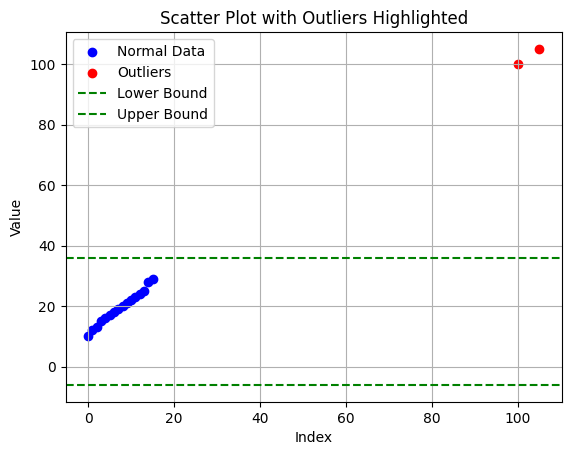

In [53]:

x_normal = range(len(normal_bound_values))
x_outliers = [x for x in outliers]

plt.scatter(x_normal, normal_bound_values, color='blue', label='Normal Data')

plt.scatter(x_outliers, outliers, color='red', label='Outliers')

plt.axhline(lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Scatter Plot with Outliers')
plt.legend()
plt.grid(True)
plt.show()